'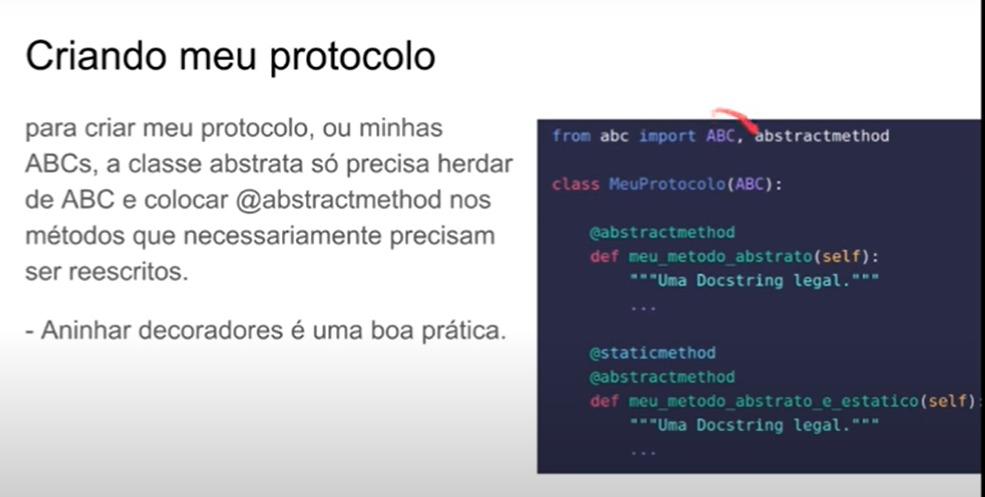

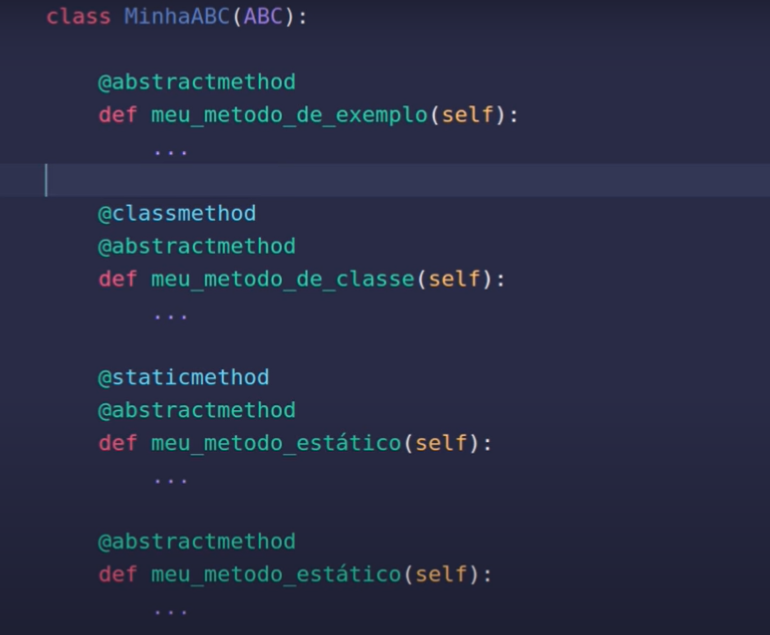

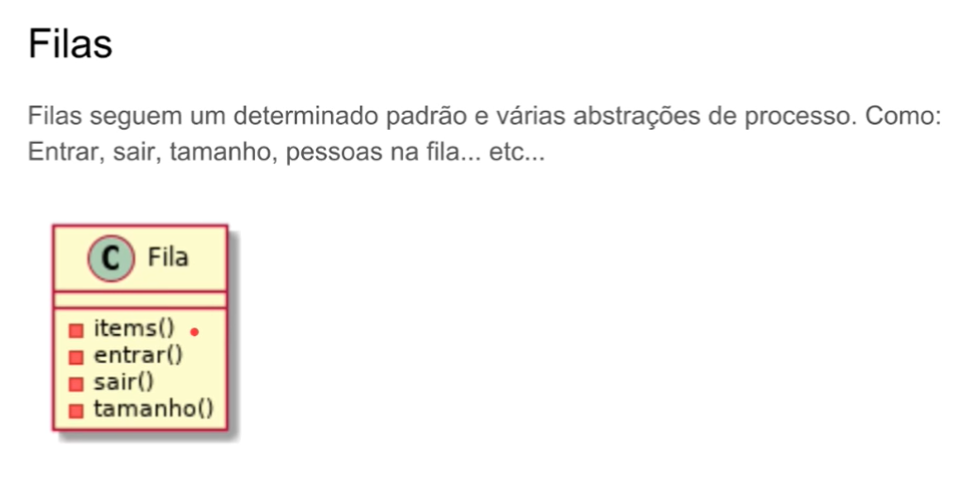

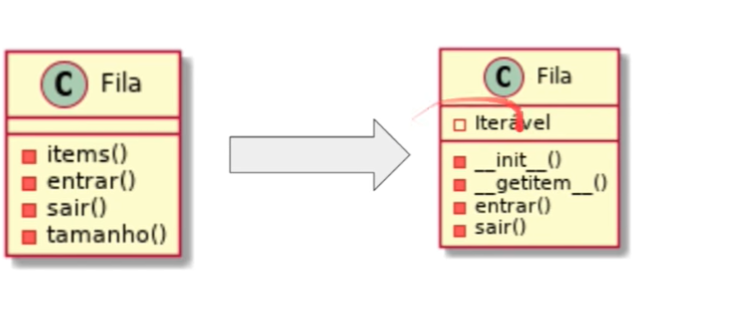

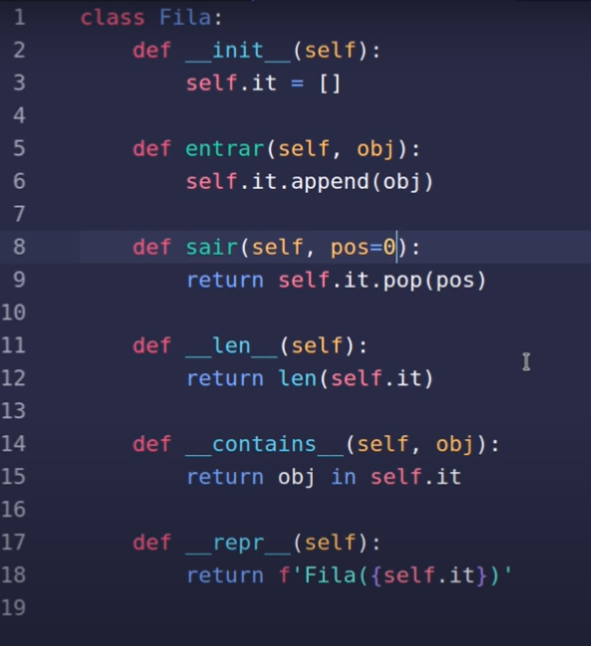

In [2]:
class Fila:
    
    def __init__(self):
        self.it = []
        
    def entrar(self, obj):
        self.it.append(obj)
        
    def sair(self, pos=0):
        return self.it.pop(pos)
    
    def __len__(self):
        return len(self.it)
    
    def __contains__(self, obj):
        return obj in self.it
    
    def __repr__(self):
        return f'Fila({self.it})'

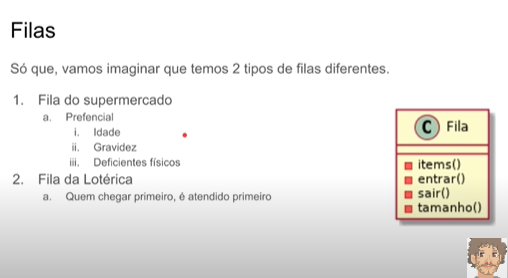

## MRO = method resolution order

In [8]:
from abc import ABC, abstractmethod

In [9]:
class Batatinha:
    def entrar(self):
        print('Batattinha-entrar')

In [15]:
class Fila:
    
    @abstractmethod
    def __init__(self):
        self.it = []
    
    @abstractmethod
    def entrar(self, obj):
        ...
    @abstractmethod    
    def sair(self, pos=0):
        ...
    @abstractmethod
    def __len__(self):
        ...
    @abstractmethod
    def __contains__(self, obj):
        ...
    
    def __repr__(self):
        return f'Fila({self.it})'

In [20]:
class Padaria(Fila):
    
    def __init__(self):
        self.it = []
        
    def entrar(self, obj):
        self.it.append(obj)
        
    def sair(self, pos=0):
        return self.it.pop(pos)
    
    def __len__(self):
        return len(self.it)
    
    def __contains__(self, obj):
        return obj in self.it
    
    def __repr__(self):
        return f'Fila({self.it})'

In [21]:
padaria = Padaria()

In [22]:
from collections import namedtuple

In [25]:
pessoa = namedtuple('Pessoa', 'nome idade gestante deficiente')

In [29]:
class SuperMercado(Fila):
    
    def __init__(self):
        self.it = []
        
    def entrar(self, obj):
        if isinstance(obj, pessoa):
            self.it.append(obj)
        else:
            raise NotImplementedError
        
        
    def sair(self, pos=0):
        return self.it.pop(pos)
    
    def __len__(self):
        return len(self.it)
    
    def __contains__(self, obj):
        return obj in self.it
    
    def __repr__(self):
        return f'Fila({self.it})'

In [30]:
Lugão = pessoa('João', 27, False, False )

In [31]:
mila = SuperMercado()

In [32]:
mila.entrar(Lugão)

In [34]:
mila

Fila([Pessoa(nome='João', idade=27, gestante=False, deficiente=False)])

Refazer a classe com as condições da fila do mercado

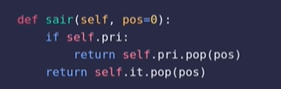

In [35]:
class SuperMercado(Fila):
    
    def __init__(self):
        self.it = []
        self.pri = []
        
    def entrar(self, obj):
        if isinstance(obj, pessoa):
            if obj.gestante or obj.deficiente or obj.idade > 64:
                self.pri.append(obj)
            else:
                self.it.append(obj)
        else:
            raise NotImplementedError
        
        
    def sair(self, pos=0):
        if self.pri:
            return self.pri.pop(pos)
        return self.it.pop(pos)
    
    def __len__(self):
        return len(self.it) + len(self.pri)
    
    def __contains__(self, obj):
        return obj in self.it
    
    def __repr__(self):
        return f'Fila({self.it})'

In [36]:
mila = SuperMercado()

In [37]:
Vicente = pessoa('Vicente', 86, False, False)

In [38]:
mila.entrar(Vicente)

In [43]:
mila.it

[]

In [44]:
mila.pri

[Pessoa(nome='Vicente', idade=86, gestante=False, deficiente=False)]